In [22]:
%load_ext autoreload
%load_ext nb_black
%autoreload 2

import numpy as np
import ncxt_sxtcnn

import logging

logger = logging.getLogger("ncxtamira")
logger.setLevel(logging.ERROR)

# Basic Template
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np
import ncxtamira

%load_ext autoreload
%autoreload 2
%load_ext nb_black
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [91]:
from ncxt_sxtcnn.hxdatabase import Database

db = Database(folder=folder1, wd=wd, sanitize=True)
df = db.dataframe()
len(df)

0

<IPython.core.display.Javascript object>

In [99]:
from ncxt_sxtcnn.pipe import NCXTPipe

db_base = "C:/Users/axela/OneDrive/Documents/2020/mock_NAS/"
folder1 = db_base + "Binned1/"
# folder1 = db_base + "Empty/"
folder2 = db_base + "Binned2/"
wd = "C:/Users/axela/Documents/2021/ncxtcnn/mock/"

pipe = NCXTPipe(
    folder=folder2,
    folder_base=folder1,
    working_directory=wd,
    task=["membrane", "nucleus"],
    fold=0,
    sanitize=True,
)

Files 14 + 13


<IPython.core.display.Javascript object>

In [47]:
pipe.dataframe()

,project,sample,hxpath,void,void1,nucleus,granule,mitochondria,membrane,nucleolus,lipid,endoplasmic reticulum,ignore
0,Stevens,Stevens_pancreatic_Ins_1E_25-10_30min_822_7,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,3,4.0,5,,,,
1,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_10,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
2,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_2,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,4,5.0,8,3.0,6.0,7.0,9.0
3,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,4,6.0,7,3.0,,5.0,
4,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_8,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,4,2,3.0,5,,,,
5,Stevens,Stevens_pancreatic_INS_1E_25mM_769_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,,3,,,,
6,Stevens,Stevens_pancreatic_INS_1E_25mM_769_7,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
7,Stevens,Stevens_pancreatic_Ins_1E_25mM_777_4,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
8,Stevens,Stevens_pancreatic_Ins_1E_25mM_777_9,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
9,Stevens,Stevens_pancreatic_Ins_1E_25mM_784_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,3,4.0,5,,,,


<IPython.core.display.Javascript object>

In [48]:
pipe.dataframe_base()

,project,sample,hxpath,void,membrane,nucleus,mitochondria,lipid,vacuole,euchromatin,heterochromatin,ignore,nucleolus,void1,granule,membrane1,endoplasmic reticulum
2,Frydman,Frydman_MG132_NES_Yeast_120_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,1.0,2.0,3.0,4.0,,,,,,,,
3,Frydman,Frydman_MG132_NLS_NES_Yeast_118_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,1.0,2.0,3.0,4.0,,,,,,,,
7,LeGros,LeGros_rad_damage_B_cell_240_9,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
8,Misc,CSH_Fibroblast_BJ_SmallCell-Axel,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,2.0,4.0,3.0,,,,,1.0,,,,
9,Partial,LeGros_AREC_B_cell_152_2,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
10,Partial,LeGros_rad_damage_B_cell_240_12,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
11,Partial,LeGros_rad_damage_B_cell_240_22,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
12,Partial,rad_damage_B_cell_240_15,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
13,Partial,rad_damage_B_cell_240_21,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,6.0,,,,,
14,Partial,rad_damage_B_cell_240_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,


<IPython.core.display.Javascript object>

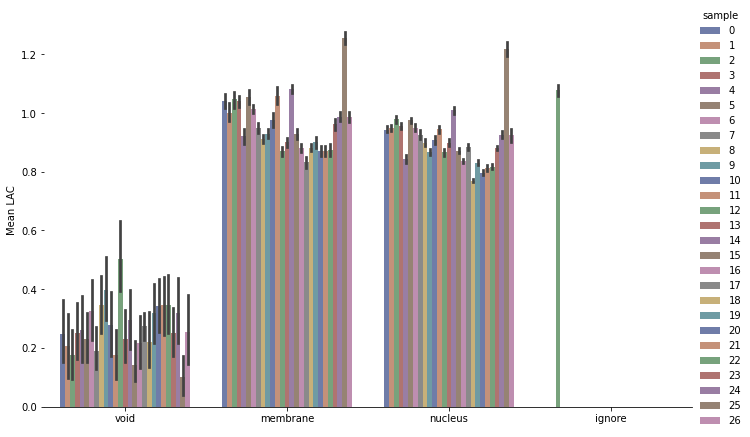

<IPython.core.display.Javascript object>

In [50]:
pipe.check_database()

In [24]:
pipe.dataframe()

,project,sample,hxpath,void,void1,nucleus,granule,mitochondria,membrane,nucleolus,lipid,endoplasmic reticulum,ignore
0,Stevens,Stevens_pancreatic_Ins_1E_25-10_30min_822_7,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,3,4.0,5,,,,
1,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_10,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
2,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_2,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,4,5.0,8,3.0,6.0,7.0,9.0
3,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,4,6.0,7,3.0,,5.0,
4,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_8,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,4,2,3.0,5,,,,
5,Stevens,Stevens_pancreatic_INS_1E_25mM_769_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,,3,,,,
6,Stevens,Stevens_pancreatic_INS_1E_25mM_769_7,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
7,Stevens,Stevens_pancreatic_Ins_1E_25mM_777_4,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
8,Stevens,Stevens_pancreatic_Ins_1E_25mM_777_9,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
9,Stevens,Stevens_pancreatic_Ins_1E_25mM_784_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,3,4.0,5,,,,


<IPython.core.display.Javascript object>

In [25]:
pipe.dataframe_base()

,project,sample,hxpath,void,membrane,nucleus,mitochondria,lipid,vacuole,euchromatin,heterochromatin,ignore,nucleolus,void1,granule,membrane1,endoplasmic reticulum
2,Frydman,Frydman_MG132_NES_Yeast_120_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,1.0,2.0,3.0,4.0,,,,,,,,
3,Frydman,Frydman_MG132_NLS_NES_Yeast_118_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,1.0,2.0,3.0,4.0,,,,,,,,
7,LeGros,LeGros_rad_damage_B_cell_240_9,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
8,Misc,CSH_Fibroblast_BJ_SmallCell-Axel,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,2.0,4.0,3.0,,,,,1.0,,,,
9,Partial,LeGros_AREC_B_cell_152_2,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
10,Partial,LeGros_rad_damage_B_cell_240_12,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
11,Partial,LeGros_rad_damage_B_cell_240_22,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
12,Partial,rad_damage_B_cell_240_15,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
13,Partial,rad_damage_B_cell_240_21,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,6.0,,,,,
14,Partial,rad_damage_B_cell_240_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,


<IPython.core.display.Javascript object>

In [21]:
pipe.train()

<IPython.core.display.Javascript object>

In [4]:
# pipe.model_summary()


<IPython.core.display.Javascript object>

In [19]:
pipe.train()


3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

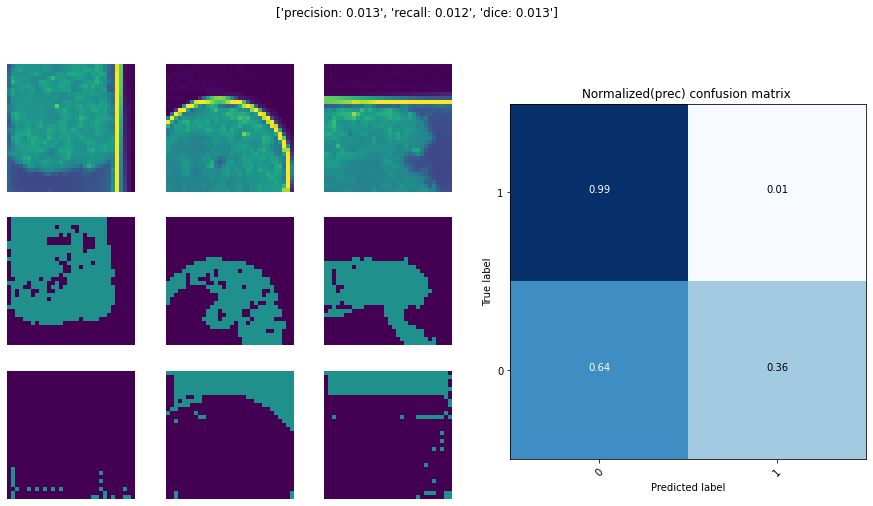

<IPython.core.display.Javascript object>

In [4]:
pipe.sxtcnn.evaluate_training_data()

In [6]:
pipe.sxtcnn.epoch_step()

sample torch.Size([4, 1, 32, 32, 32]) torch.Size([4, 32, 32, 32])


RuntimeError: CUDA error: device-side assert triggered

<IPython.core.display.Javascript object>

In [7]:
pipe.sxtcnn.run()

RuntimeError: CUDA error: device-side assert triggered

<IPython.core.display.Javascript object>

In [2]:
import ncxt_sxtcnn
from ncxt_sxtcnn.hxdatabase import Database
from ncxt_sxtcnn.sxtcnn.loaders import AmiraLoaderClahe, AmiraLoaderx100
from ncxt_sxtcnn.sxtcnn.models import UNet3D
from ncxt_sxtcnn.sxtcnn.processors import RandomBlockProcessor, NonZeroSplitProcessor
from ncxt_sxtcnn.sxtcnn.criteria import CrossEntropyLoss_DiceLoss
from ncxt_sxtcnn import Segmenter

<IPython.core.display.Javascript object>

In [29]:
wd = "C:/Users/axela/OneDrive/Documents/2020/mock_NAS/"
folder1 = wd + "Binned1/"
folder2 = wd + "Binned2/"
working_directory = wd

<IPython.core.display.Javascript object>

In [30]:
db_base = Database(folder=folder1, wd=wd, sanitize=True)
db_base.dataframe_sel("membrane")

,project,sample,hxpath,void,membrane,nucleus,mitochondria,lipid,vacuole,euchromatin,heterochromatin,ignore,nucleolus,void1,granule,membrane1,endoplasmic reticulum
0,Cogdell,Cogdell_Rubrum_HL_1003_2,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,,,,,,,,,,,,
1,Cogdell,Cogdell_Rubrum_HL_1003_3,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,,,,,,,,,,,,
2,Frydman,Frydman_MG132_NES_Yeast_120_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,1.0,2.0,3.0,4.0,,,,,,,,
3,Frydman,Frydman_MG132_NLS_NES_Yeast_118_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,1.0,2.0,3.0,4.0,,,,,,,,
4,Hammel,1209_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,,,,,2.0,,,,,,,
5,Hammel,1216_3,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,,,,,2.0,,,,,,,
6,LeGros,LeGros_rad_damage_B_cell_240_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,,5.0,3.0,,2.0,4.0,6.0,,,,,
7,LeGros,LeGros_rad_damage_B_cell_240_9,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
8,Misc,CSH_Fibroblast_BJ_SmallCell-Axel,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,2.0,4.0,3.0,,,,,1.0,,,,
9,Partial,LeGros_AREC_B_cell_152_2,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,


<IPython.core.display.Javascript object>

In [32]:
db_project = Database(folder=folder2, wd=wd, sanitize=True)
db.dataframe_sel("nucleus")

,project,sample,hxpath,void,void1,nucleus,granule,mitochondria,membrane,nucleolus,lipid,endoplasmic reticulum,ignore
0,Stevens,Stevens_pancreatic_Ins_1E_25-10_30min_822_7,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,3,4.0,5,,,,
1,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_10,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
2,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_2,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,4,5.0,8,3.0,6.0,7.0,9.0
3,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,4,6.0,7,3.0,,5.0,
4,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_8,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,4,2,3.0,5,,,,
5,Stevens,Stevens_pancreatic_INS_1E_25mM_769_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,,3,,,,
6,Stevens,Stevens_pancreatic_INS_1E_25mM_769_7,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
7,Stevens,Stevens_pancreatic_Ins_1E_25mM_777_4,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
8,Stevens,Stevens_pancreatic_Ins_1E_25mM_777_9,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
9,Stevens,Stevens_pancreatic_Ins_1E_25mM_784_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,3,4.0,5,,,,


<IPython.core.display.Javascript object>

In [23]:
files = db.filelist(["membrane"])
features = [["membrane"], ["mitochondria"], ["lipid"], ["nucleus"]]

loader_args = {"files": files, "features": features}
processor_args = {"block_shape": (64, 64, 64), "binning": 2, "pad": 8}


loader = AmiraLoaderx100(**loader_args)
processor = NonZeroSplitProcessor(**processor_args)
processor.setloader(loader)
data = processor.get_data(0, 0)

[220200, 217482, 215013, 218023, 223256]
[262144, 262144, 262144, 262144, 262144]
[2747, 36194, 47503, 7804, 31647]
[44691, 80856, 94634, 51925, 70535]
Split has 64 blocks  of shape (64, 64, 64) of which 63 are nonzero in volume (400, 419, 423)


<IPython.core.display.Javascript object>

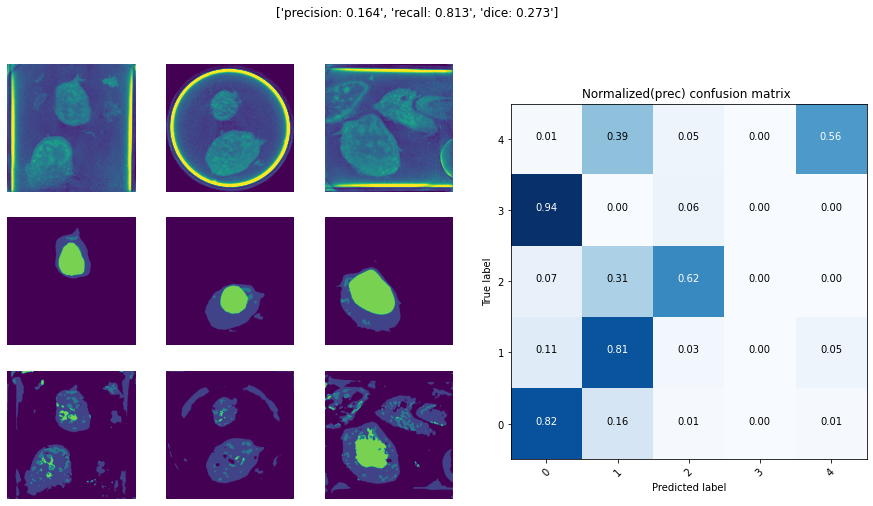

<IPython.core.display.Javascript object>

In [15]:
seg.logger.plot()
_ = seg.evaluate_sample(1, plot=True)

In [17]:
wd = "c:/Users/axela/Documents/2020/hypertonic/"
folder = wd+'amira'
working_directory = wd + "cnn/"

db = Database(folder=folder, wd=wd, sanitize=True)
db.dataframe_sel("membrane")

files = db.filelist(["membrane"])
features = [  ["mitochondria"] ]

loader_args = {"files": files, "features": features}
processor_args = {"block_shape": (64, 64, 64), "binning": 2, "pad":8,"rel_threshold":0.001}
model_args = {
    "num_classes": len(features) + 1,
    "depth": 3,
    "start_filts": 48,
    "dropout": None,
    "instancenorm": True,
}
crit_args = dict()
settings = {"maximum_iterations": 20}
segmenter = Segmenter(
    AmiraLoaderx100,
    NonZeroSplitProcessor,
    UNet3D,
    CrossEntropyLoss_DiceLoss,
    loader_args,
    processor_args,
    model_args,
    crit_args,
    settings,
)
segmenter.folder = working_directory
segmenter.setup()
seg = segmenter.load_trained(0)






Split has 125 blocks  of shape (64, 64, 64) of which 51 are nonzero in volume (475, 494, 475)
Split has 125 blocks  of shape (64, 64, 64) of which 32 are nonzero in volume (477, 497, 477)
Split has 125 blocks  of shape (64, 64, 64) of which 66 are nonzero in volume (467, 486, 467)
Split has 125 blocks  of shape (64, 64, 64) of which 27 are nonzero in volume (493, 490, 493)



Split has 125 blocks  of shape (64, 64, 64) of which 50 are nonzero in volume (475, 494, 475)
Split has 125 blocks  of shape (64, 64, 64) of which 31 are nonzero in volume (477, 497, 477)
Split has 125 blocks  of shape (64, 64, 64) of which 70 are nonzero in volume (467, 486, 467)
Split has 125 blocks  of shape (64, 64, 64) of which 28 are nonzero in volume (493, 490, 493)

loading model model 18806 {'name': 'UNet3D', 'training': True, 'up_mode': 'transpose', 'num_classes': 2, 'in_channels': 1, 'start_filts': 48, 'dropout': None, 'instancenorm': True, 'dirichlet': False, 'depth': 3}
Missing file c:\Users\axela\Documents\2020\hypertonic\cnn\data63935/18806_state.npy
State not found, training



model 18806 {'name': 'UNet3D', 'training': True, 'up_mode': 'transpose', 'num_classes': 2, 'in_channels': 1, 'start_filts': 48, 'dropout': None, 'instancenorm': True, 'dirichlet': False, 'depth': 3}
model 18806 {'name': 'UNet3D', 'training': True, 'up_mode': 'transpose', 'num_classes': 2, 'in_channels': 1, 'start_filts': 48, 'dropout': None, 'instancenorm': True, 'dirichlet': False, 'depth': 3}


<IPython.core.display.Javascript object>

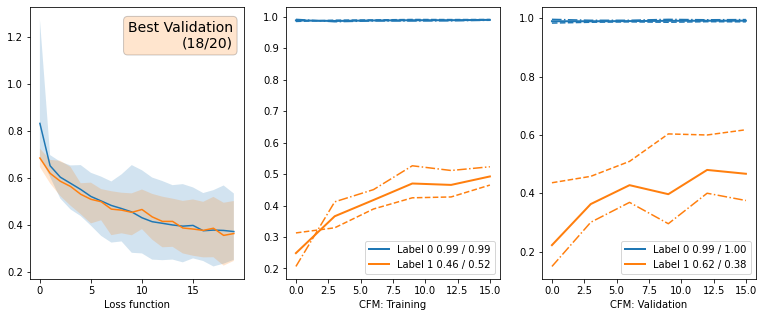

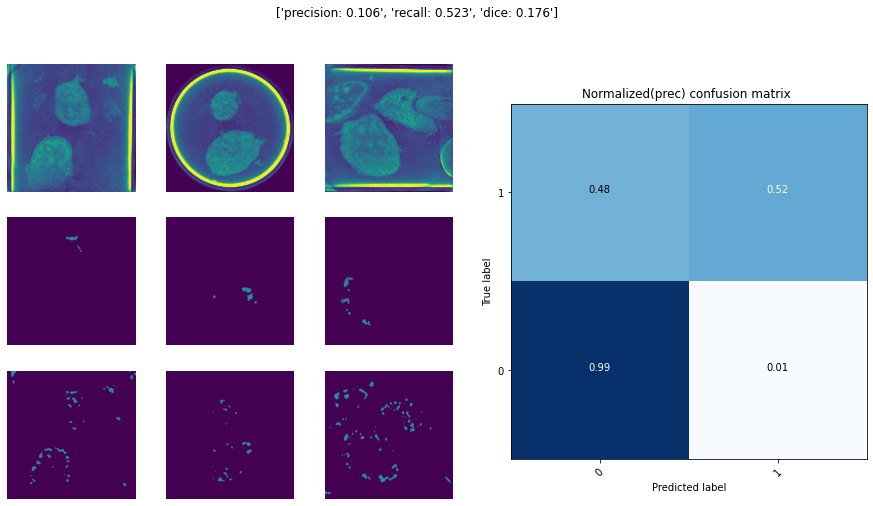

<IPython.core.display.Javascript object>

In [18]:
seg.logger.plot()
_ = seg.evaluate_sample(1, plot=True)

In [220]:
import ncxtutils

tb = segmenter.data(0, mode="train")
print(f"tb has {len(tb)} blocks")

tb has 179 blocks


<IPython.core.display.Javascript object>

Mode train 179/179
Mode validation 177/177


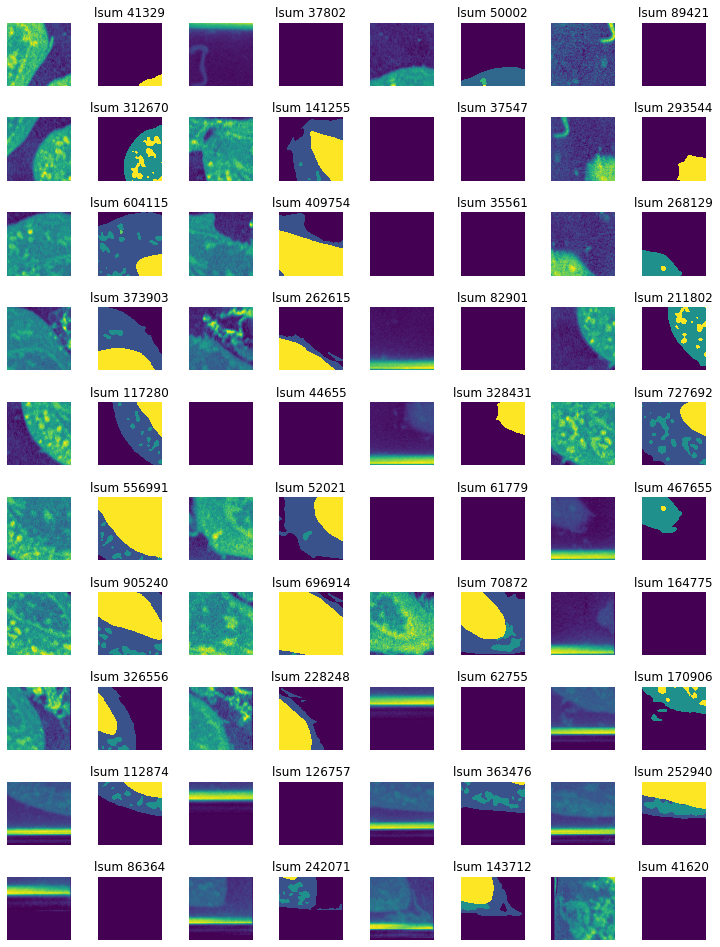

<IPython.core.display.Javascript object>

In [222]:
n_max = 40
f, axes = plt.subplots(ncols=2 * 4, nrows=n_max // 4, figsize=(13, 13))
axes = axes.ravel()
for i, b in enumerate(tb):
    if i >= n_max:
        break
    axes[2 * i].imshow(b[0][0, :, :, 0])
    axes[2 * i + 1].imshow(b[1][:, :, 0])
    axes[2 * i + 1].set_title(f"lsum {np.sum(b[1])}")
for ax in axes:
    ax.set_axis_off()
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.0)

for mode in ["train", "validation"]:
    tb = segmenter.data(0, mode=mode)
    print(f"Mode {mode} {sum([np.sum(b[1])>0 for b in tb])}/{len(tb)}")